# Practice Project - Insurance Cost Analysis

<p>In this project, you have to perform analytics operations on an insurance database that uses the below-mentioned parameters.</p>
<table style="border-collapse: collapse; border: 1px solid; text-align: center;">
    <thead>
    <tr>
        <th style="border: 1px solid; text-align: left;">Parameter</th>
        <th style="border: 1px solid; text-align: left;">Description</th>
        <th style="border: 1px solid; text-align: left;">Content Type</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="border: 1px solid; text-align: left;">age</td>
        <td style="border: 1px solid; text-align: left;">Age in years</td>
        <td style="border: 1px solid; text-align: left;">integer</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">gender</td>
        <td style="border: 1px solid; text-align: left;">Male or Female</td>
        <td style="border: 1px solid; text-align: left;">integer (1 or 2)</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">bmi</td>
        <td style="border: 1px solid; text-align: left;">Body mass index</td>
        <td style="border: 1px solid; text-align: left;">float</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">no_of_children</td>
        <td style="border: 1px solid; text-align: left;">Number of children</td>
        <td style="border: 1px solid; text-align: left;">integer</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">smoker</td>
        <td style="border: 1px solid; text-align: left;">Whether smoker or not</td>
        <td style="border: 1px solid; text-align: left;">integer (0 or 1)</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">region</td>
        <td style="border: 1px solid; text-align: left;">Which US region - NW, NE, SW, SE</td>
        <td style="border: 1px solid; text-align: left;">integer (1, 2, 3 or 4 respectively)</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">charges</td>
        <td style="border: 1px solid; text-align: left;">Annual Insurance charges in USD</td>
        <td style="border: 1px solid; text-align: left;">float</td>
    </tr>
    </tbody>
</table>

## Setup

### Importing Required Libraries

In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

### Download the dataset

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"

## Task 1 - Import the dataset

<p>Import the dataset into a <code>pandas.DataFrame</code>. Note that there are currently no headers in the CSV file. And print the first 10 rows of the dataframe to confirm successful loading.</p>

In [4]:
filename = download_file(data_url)

Downloading: 100.00% (78536 / 78536 bytes)
Download Complete.


In [5]:
df = pd.read_csv(filename, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


<p>Add the headers to the dataframe, as above-mentioned in the project scenario.</p>

In [6]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


<p>Now, replace the <code>?</code> entries with <code>NaN</code> values.</p>

In [7]:
df = df.replace("?", np.nan)

## Task 2 - Data Wrangling

<p>Use <code>dataframe.info()</code> method to identify the columns that have some <code>Null</code> (or <code>NaN</code>) information.</p>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


<p>Handle missing data:</p>
<ul>
    <li>For continuous attributes such as <code>age</code>, replace missing values with the mean.</li>
    <li>For categorical attributes such as <code>smoker</code>, replace missing values with the most frequent value.</li>
    <li>Update the data types of the respective columns.</li>
    <li>Verify the update using <code>dataframe.info()</code>.</li>
</ul>

In [9]:
is_smoker = df["smoker"].value_counts().idxmax()
df["smoker"] = df["smoker"].replace(np.nan, is_smoker)

mean_age = df["age"].astype("float").mean(axis=0)
df["age"] = df["age"].replace(np.nan, mean_age)

df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


<p>Also, please note that the <code>charges</code> column has values which are more than 2 decimal places long. Update this column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.</p>

In [10]:
df[["charges"]] = np.round(df[["charges"]], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## Task 3 - Exploratory Data Analysis (EDA)

<p>Implement the Regression Plot for <code>charges</code> with respect to <code>bmi</code>.</p>

(0.0, 66902.85800000001)

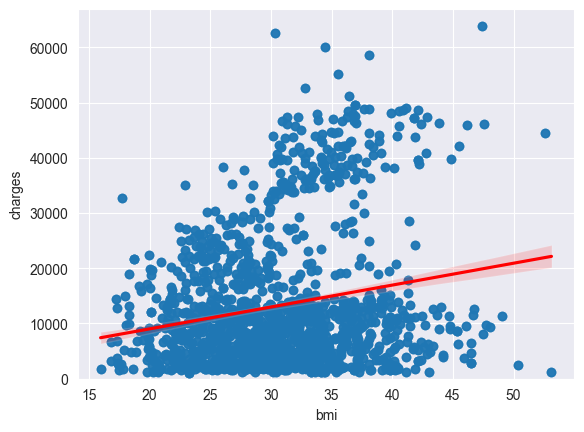

In [11]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(bottom=0)

<p>Implement the box plot for <code>charges</code> with respect to <code>smoker</code>.</p>

<Axes: xlabel='smoker', ylabel='charges'>

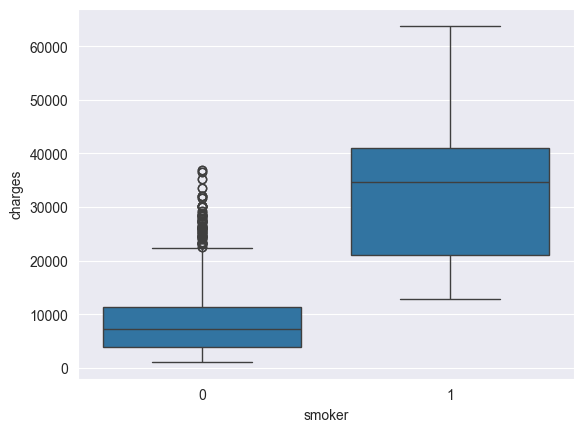

In [12]:
sns.boxplot(x="smoker", y="charges", data=df)

<p>Print the correlation matrix for the dataset.</p>

In [13]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


## Task 4 - Model Development

<p>Fit a Linear Regression model that may be used to predict the <code>charges</code> value, just by using the <code>smoker</code> attribute of the dataset. Print the $R^2$ score of this model.</p>

In [14]:
x = df[["smoker"]]
y = df["charges"]

lm = LinearRegression()
lm.fit(x, y)
lm.score(x, y)

0.6221791733924185

<p>Fit a Linear Regression model that may be used to predict the <code>charges</code> value, just by using all other attributes of the dataset. Print the $R^2$ score of this model. You should see an improvement in the performance.</p>

In [15]:
z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(z, y)
lm.score(z, y)

0.7504083820289634

<p>Create a training pipeline that uses <code>StandardScaler()</code>, <code>PolynomialFeatures()</code> and <code>LinearRegression()</code> to create a model that can predict the <code>charges</code> value using all the other attributes of the dataset. There should be even further improvement in the performance.</p>

In [16]:
input_ = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]
pipe = Pipeline(input_)
z = z.astype("float")
pipe.fit(z, y)
y_pipe = pipe.predict(z)
r2_score(y, y_pipe)

0.8452576213500093

## Task 5 - Model Refinement

<p>Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.</p>

In [17]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=0)

<p>Initalize a Ridge Regressor that used hyperparameter $\alpha=0.1$. Fit the model using training data subset. Print the $R^2$ score for the testing data.</p>

In [18]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
y_hat = ridge_model.predict(x_test)
r2_score(y_test, y_hat)

0.7469894680059708

<p>Apply polynomial transformation to the training parameters with <code>degree=2</code>. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $R^2$ score for the testing subset.</p>

In [19]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

ridge_model.fit(x_train_pr, y_train)
y_hat = ridge_model.predict(x_test_pr)

r2_score(y_test, y_hat)

0.8410037679926489

****
This is the end of the file.
****